# Notebook introudcution 

In This notebook i'm going to apply 5 models on COVID-19 outcome prediction

Tuning the hyper parameters.

Evaluating the score metrics in order to choose the best fitted model.

# What is covered 
    1. Getting the data ready
    2. Choose the right estimator/algorithm for our problems
    3. Fit the model/algorithm and use it to make predictions on our data
    4. Evaluating a model
    5. Improve a models

In [2]:
#standard imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

#skLearn imports
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Getting the data ready

In [3]:
# 1. Getting the data ready 
covid_outcome = pd.read_csv("data.csv")
covid_outcome

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


In [4]:
covid_outcome.drop("Unnamed: 0",axis = 1, inplace=True)
covid_outcome.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [5]:
featureList = ['location','country','symptom1','symptom2','symptom3','symptom4','symptom5','symptom6','diff_sym_hos']
for i in featureList:
    print(f"{i} \t {covid_outcome[i].nunique()}")

location 	 139
country 	 34
symptom1 	 25
symptom2 	 32
symptom3 	 20
symptom4 	 13
symptom5 	 4
symptom6 	 2
diff_sym_hos 	 18


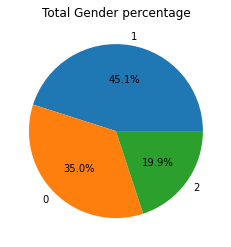

In [5]:
gender = covid_outcome['gender'].value_counts()
gender.plot.pie(title ='Total Gender percentage', ylabel='', autopct='%1.1f%%');

In [6]:
covid_outcome[covid_outcome.diff_sym_hos < 0]

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
223,56,18,1,35.0,0,0,6,31,19,12,3,1,-1,0
240,128,18,1,65.0,0,0,6,31,19,12,3,1,-5,0


In [7]:
## dropping the outlayers
covid_outcome.drop(240,axis = 0, inplace=True)
covid_outcome.drop(223,axis = 0, inplace=True)

#### searching the data and checking categorical features then encode them

In [8]:
covid_outcome["country"].value_counts()

18    170
8     155
13     90
24     86
12     54
29     37
11     35
28     33
25     32
23     31
30     17
4      17
32     15
15     14
31     14
2      11
7      10
19      9
33      8
21      4
14      3
17      3
3       2
9       1
1       1
0       1
6       1
20      1
16      1
5       1
26      1
10      1
22      1
27      1
Name: country, dtype: int64

In [9]:
covid_outcome["location"].value_counts()

108    85
45     78
44     43
114    37
110    33
       ..
8       1
77      1
60      1
37      1
15      1
Name: location, Length: 139, dtype: int64

In [10]:
### Dropping the gender feature
covid_copy = covid_outcome.copy()
covid_copy.drop("gender",axis = 1, inplace=True)

In [11]:
categorical_columns = ['location','country']
for column in categorical_columns:
    tempdf = pd.get_dummies(covid_copy[column], prefix=column)
    covid_copy = pd.merge(
        left=covid_copy,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    covid_copy = covid_copy.drop(columns=column)


In [12]:
covid_copy.head()


,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,66.0,1,0,14,31,19,12,3,1,8,...,0,0,0,0,0,0,0,0,0,0
1,56.0,0,1,14,31,19,12,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,46.0,0,1,14,31,19,12,3,1,13,...,0,0,0,0,0,0,0,0,0,0
3,60.0,1,0,14,31,19,12,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,58.0,0,0,14,31,19,12,3,1,0,...,0,0,0,0,0,0,0,0,0,0


## splitting data into X , Y then standardize it

In [13]:
## splitting into X/y
# Create X (features matrix)
X = covid_copy.drop("result", axis=1)

# Create y (Labels)
y = covid_copy["result"]


In [14]:
## normalize the data 
from sklearn import preprocessing

ss = preprocessing.normalize(X)

names = X.columns.values.tolist()
scaled_covid = pd.DataFrame(ss, columns = names)
scaled_covid.head()


,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,0.845390,0.012809,0.000000,0.179325,0.397077,0.243370,0.153707,0.038427,0.012809,0.102472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.807366,0.000000,0.014417,0.201841,0.446935,0.273928,0.173007,0.043252,0.014417,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730988,0.000000,0.015891,0.222475,0.492622,0.301930,0.190693,0.047673,0.015891,0.206584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.826114,0.013769,0.000000,0.192760,0.426826,0.261603,0.165223,0.041306,0.013769,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.817145,0.000000,0.000000,0.197242,0.436750,0.267685,0.169064,0.042266,0.014089,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
## selecting best features
from sklearn.feature_selection import SelectKBest, chi2
X_final = SelectKBest(chi2, k = 14).fit_transform(scaled_covid, y)
X_final.shape

(861, 14)

## splitting the data into training & testing & validation 

In [16]:
np.random.seed(42)

# Split the data into train, validation & test sets by 80 , 10 , 10
X_train, X_both, y_train, y_both = train_test_split(X_final, y, test_size = 0.2, random_state=5)
X_test, X_valid, y_test, y_valid = train_test_split(X_both, y_both, test_size = 0.5, random_state=5)

X_train.shape , X_test.shape , X_valid.shape ,y_valid.shape


((688, 14), (86, 14), (87, 14), (87,))

## 1- KNN estimator 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)

### 1.1 Evaluating the model before the tuning of hyper-params

In [18]:
## function to evaluate the model
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Make baseline predictions
y_preds = knn.predict(X_valid)

# Evaluate the classifier on validation set
baseline_knn_metrics = evaluate_preds(y_valid, y_preds)
baseline_knn_metrics

Acc: 90.80%
Precision: 0.62
Recall: 0.83
F1 score: 0.71


{'accuracy': 0.91, 'precision': 0.62, 'recall': 0.83, 'f1': 0.71}

#### `confusion matrix`

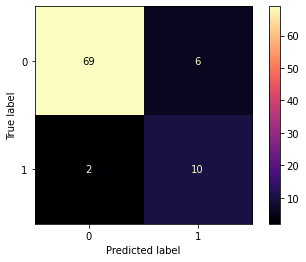

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=knn, X=X_valid, y=y_valid , cmap="magma");

#### `cross-validated accuracy`

In [20]:
np.random.seed(42)
knn_cross_val_score = cross_val_score(knn, X_final, y, cv=5)
np.mean(knn_cross_val_score)
print(f"Covid outcome prediction Cross-Validated Accuracy: {np.mean(knn_cross_val_score) *100:.2f}%")

Covid outcome prediction Cross-Validated Accuracy: 91.76%


#### `classifcation report`

In [21]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95        75
           1       0.62      0.83      0.71        12

    accuracy                           0.91        87
   macro avg       0.80      0.88      0.83        87
weighted avg       0.92      0.91      0.91        87



### `ROC`

In [22]:
#  function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="blue", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

In [23]:
y_probs = knn.predict_proba(X_valid)
y_probs_positive = y_probs[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)

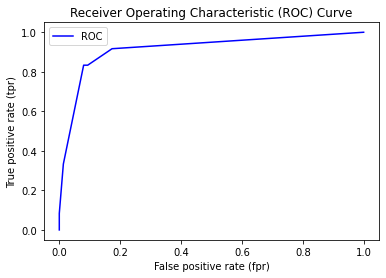

In [24]:
plot_roc_curve(fpr, tpr)

### 1.1 Finding the best hyper-params

In [25]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

### using Grid search Cv


In [26]:
grid = { 'n_neighbors': list(range(1,10)),
         'weights': ['uniform', 'distance']}

In [27]:
np.random.seed(42)
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=grid, 
                      cv=5,
                      verbose=2)
# Fit the GridSearchCV version of knn
gs_knn.fit(X_train, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=1, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END ....................n_neighbors=1, weights=distance; total time=   0.0s
[CV] END .....................n_neighbors=2, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=2, wei

In [28]:
gs_knn.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [29]:
gs_knn_y_preds = gs_knn.predict(X_test)
# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_knn_y_preds)

Acc: 93.02%
Precision: 0.75
Recall: 0.60
F1 score: 0.67


`ROC for tuned model`

In [30]:
y_probs = gs_knn.predict_proba(X_valid)
y_probs_positive = y_probs[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)

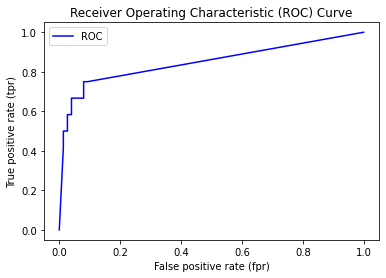

In [31]:
plot_roc_curve(fpr,tpr)

`confusion matrix`

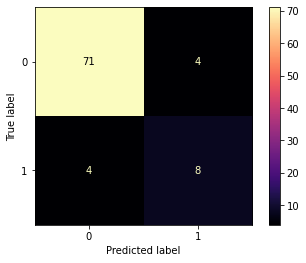

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=gs_knn, X=X_valid, y=y_valid , cmap="magma");

### comparing baseline model with tuned model metrics

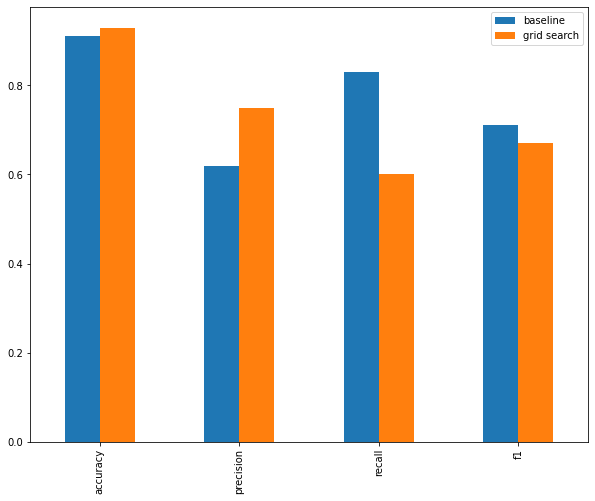

In [33]:
compare_metrics = pd.DataFrame({"baseline": baseline_knn_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 2- Logistic Regression estimator 

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0).fit(X_train, y_train)


### 2.1 Evaluating the model before the tuning of hyper-params

In [35]:
# Make baseline predictions
y_pred_log_reg = logreg.predict(X_valid)

# Evaluate the classifier on validation set
baseline_log_reg_metrics = evaluate_preds(y_valid, y_pred_log_reg)
baseline_log_reg_metrics

Acc: 86.21%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.86, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

`confusion matrix`

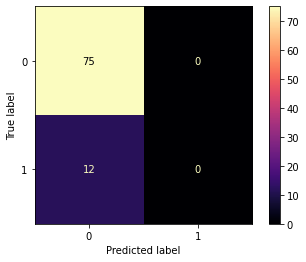

In [37]:
ConfusionMatrixDisplay.from_estimator(estimator=logreg, X=X_valid, y=y_valid , cmap="magma");

`cross-validated accuracy`

In [36]:
np.random.seed(42)
log_reg_cross_val_score = cross_val_score(logreg, X_final, y, cv=5)
np.mean(knn_cross_val_score)
print(f"Covid outcome prediction Cross-Validated Accuracy: {np.mean(log_reg_cross_val_score) *100:.2f}%")

Covid outcome prediction Cross-Validated Accuracy: 87.81%


`classifcation report`


In [37]:
print(classification_report(y_valid, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        75
           1       0.00      0.00      0.00        12

    accuracy                           0.86        87
   macro avg       0.43      0.50      0.46        87
weighted avg       0.74      0.86      0.80        87



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


`ROC`

In [38]:
y_probs_log_reg = logreg.predict_proba(X_valid)
y_probs_positive = y_probs_log_reg[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)

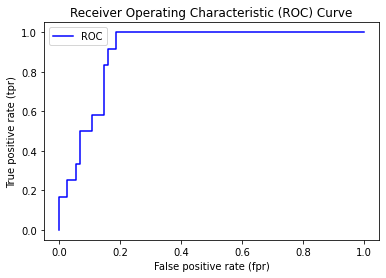

In [39]:
plot_roc_curve(fpr, tpr)

### 2.2 Finding the best hyper-params



In [40]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid_log_reg = { 'C': [0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['none','l1', 'l2'],
    'solver': ['lbfgs', 'liblinear']}
np.random.seed(42)
gs_log_reg = GridSearchCV(estimator=logreg,
                      param_grid=grid_log_reg, 
                      cv=10,
                      verbose=2)
# Fit the GridSearchCV version of knn
gs_log_reg.fit(X_train, y_train);

In [44]:
gs_log_reg.best_params_

{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}

In [42]:
gs_y_preds_log_reg = gs_log_reg.predict(X_valid)
# evaluate the predictions
gs_log_reg_metrics = evaluate_preds(y_valid, gs_y_preds_log_reg)

Acc: 91.95%
Precision: 0.73
Recall: 0.67
F1 score: 0.70


`ROC for tuned model`




In [46]:
y_probs_log_reg = gs_log_reg.predict_proba(X_test)
y_probs_positive = y_probs_log_reg[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

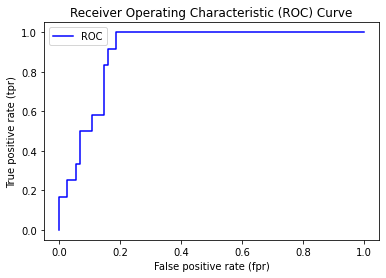

In [43]:
plot_roc_curve(fpr,tpr)

`confusion matrix`

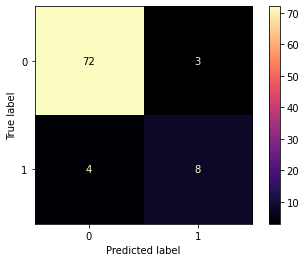

In [44]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_log_reg, X=X_valid, y=y_valid , cmap="magma");

### comparing baseline model with tuned model metrics


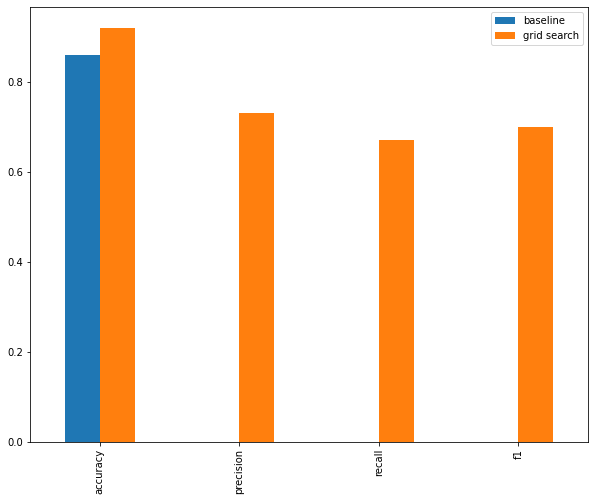

In [45]:
compare_metrics = pd.DataFrame({"baseline": baseline_log_reg_metrics,
                                "grid search": gs_log_reg_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 3- Naive bayes estimator 

In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

### 3.1 Evaluating the model before the tuning of hyper-params

In [47]:
# Make baseline predictions
y_pred_gnb = gnb.predict(X_valid)

# Evaluate the classifier on validation set
baseline_gnb_metrics = evaluate_preds(y_valid, y_pred_gnb)
baseline_gnb_metrics

Acc: 86.21%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.86, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

`confusion matrix`

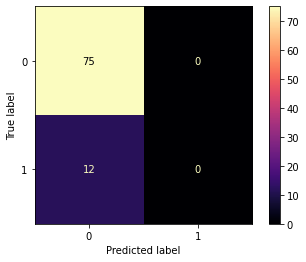

In [48]:
ConfusionMatrixDisplay.from_estimator(estimator=gnb, X=X_valid, y=y_valid , cmap="magma");

`cross-validated accuracy`



In [49]:
np.random.seed(42)
gnb_cross_val_score = cross_val_score(logreg, X_final, y, cv=5)
np.mean(gnb_cross_val_score)
print(f"Covid outcome prediction Cross-Validated Accuracy: {np.mean(gnb_cross_val_score) *100:.2f}%")

Covid outcome prediction Cross-Validated Accuracy: 87.81%


`classifcation report`



In [50]:
print(classification_report(y_valid, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        75
           1       0.00      0.00      0.00        12

    accuracy                           0.86        87
   macro avg       0.43      0.50      0.46        87
weighted avg       0.74      0.86      0.80        87



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y_probs_gnb = gnb.predict_proba(X_valid)
y_probs_positive = y_probs_gnb[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)

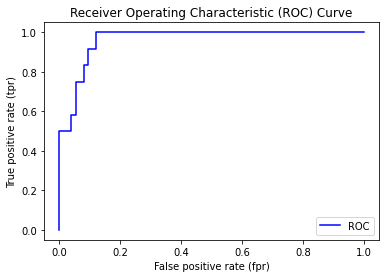

In [52]:
plot_roc_curve(fpr, tpr)

### 3.2 Finding the best hyper-params


In [53]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [54]:
grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}
np.random.seed(42)
gs_gnb = GridSearchCV(estimator=gnb,
                      param_grid=grid_gnb, 
                      cv=5,
                      verbose=1,
                      scoring='accuracy')
# Fit the GridSearchCV version of Gaussian naive bayes
gs_gnb.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [55]:
gs_gnb.best_params_

{'var_smoothing': 0.0002310129700083158}

In [56]:
gs_y_preds_gnb = gs_gnb.predict(X_test)
# evaluate the predictions
gs_gnb_metrics = evaluate_preds(y_test, gs_y_preds_gnb)

Acc: 90.70%
Precision: 0.62
Recall: 0.50
F1 score: 0.56


`ROC for tuned model`



In [61]:
y_probs_gnb = gs_gnb.predict_proba(X_test)
y_probs_positive = y_probs_gnb[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

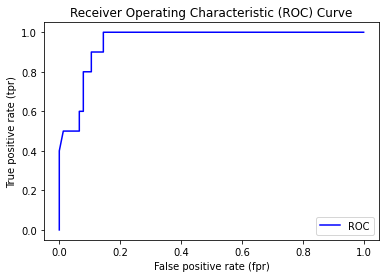

In [62]:
plot_roc_curve(fpr,tpr)

`confusion matrix`

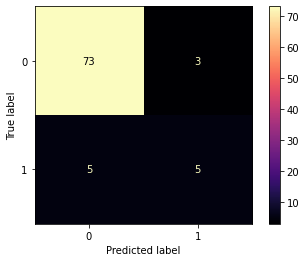

In [63]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_gnb, X=X_test, y=y_test , cmap="magma");

### comparing baseline model with tuned model metrics


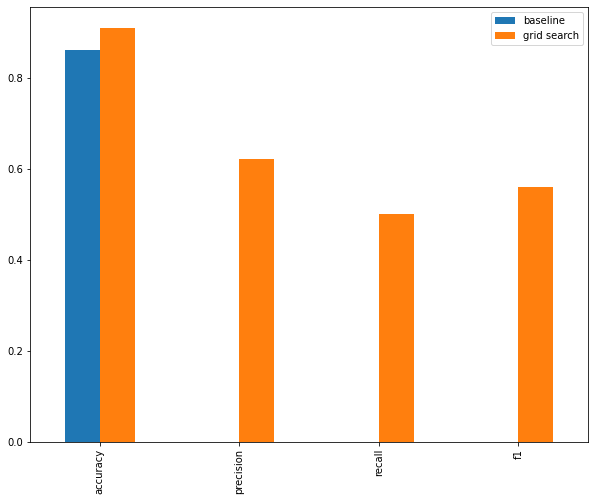

In [64]:
compare_metrics = pd.DataFrame({"baseline": baseline_gnb_metrics,
                                "grid search": gs_gnb_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## 4- Decision tree estimator 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [58]:
dtree = DecisionTreeClassifier(random_state=3)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

### 4.1 Evaluating the model before the tuning of hyper-params

In [59]:
# Make baseline predictions
y_pred_dtree = dtree.predict(X_valid)

# Evaluate the classifier on validation set
baseline_dtree_metrics = evaluate_preds(y_valid, y_pred_dtree)
baseline_dtree_metrics

Acc: 89.66%
Precision: 0.60
Recall: 0.75
F1 score: 0.67


{'accuracy': 0.9, 'precision': 0.6, 'recall': 0.75, 'f1': 0.67}

`confusion matrix`


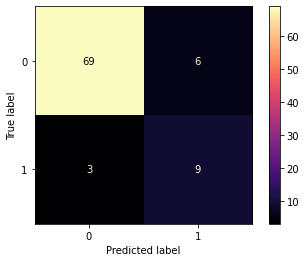

In [60]:
ConfusionMatrixDisplay.from_estimator(estimator=dtree, X=X_valid, y=y_valid , cmap="magma");

`cross-validated accuracy`



In [61]:
np.random.seed(42)
dtree_cross_val_score = cross_val_score(dtree, X_final, y, cv=5)
np.mean(dtree_cross_val_score)
print(f"Covid outcome prediction Cross-Validated Accuracy: {np.mean(dtree_cross_val_score) *100:.2f}%")

Covid outcome prediction Cross-Validated Accuracy: 91.18%


`classifcation report`

In [62]:
print(classification_report(y_valid, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        75
           1       0.60      0.75      0.67        12

    accuracy                           0.90        87
   macro avg       0.78      0.83      0.80        87
weighted avg       0.91      0.90      0.90        87



`ROC`

In [63]:
y_probs_dtree = dtree.predict_proba(X_valid)
y_probs_positive = y_probs_dtree[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)

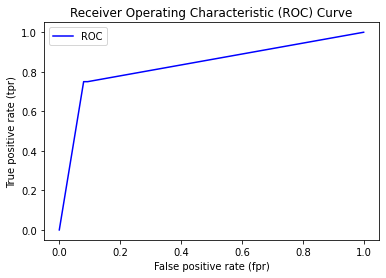

In [64]:
plot_roc_curve(fpr, tpr)

### 4.2 Finding the best hyper-params


In [65]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 3,
 'splitter': 'best'}

In [73]:
grid_dtree = {'max_depth': np.arange(1,15),
              'max_features': np.arange(1,15),
              'random_state': [3]}
np.random.seed(42)
gs_dtree = GridSearchCV(estimator=dtree,
                      param_grid=grid_dtree, 
                      cv=7,
                      verbose=1,
                      refit=True)
# Fit the GridSearchCV version of Decision Tree
gs_dtree.fit(X_train, y_train);

Fitting 7 folds for each of 196 candidates, totalling 1372 fits


In [74]:
gs_dtree.best_params_

{'max_depth': 8, 'max_features': 9, 'random_state': 3}

### 4.3 Evaluating Tuned mode

In [75]:
gs_y_preds_dtree = gs_dtree.predict(X_valid)
# evaluate the predictions
gs_dtree_metrics = evaluate_preds(y_valid, gs_y_preds_dtree)

Acc: 87.36%
Precision: 0.55
Recall: 0.50
F1 score: 0.52


`ROC for tuned model`



In [76]:
y_probs_dtree = gs_dtree.predict_proba(X_test)
y_probs_positive = y_probs_dtree[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

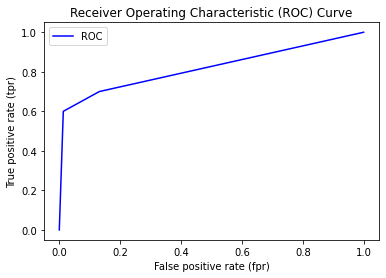

In [77]:
plot_roc_curve(fpr,tpr)

`confusion matrix`

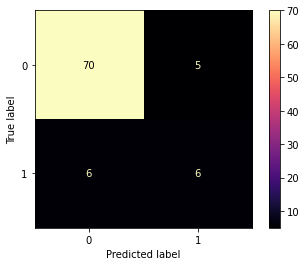

In [79]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_dtree, X=X_valid, y=y_valid , cmap="magma");

### comparing baseline model with tuned model metrics


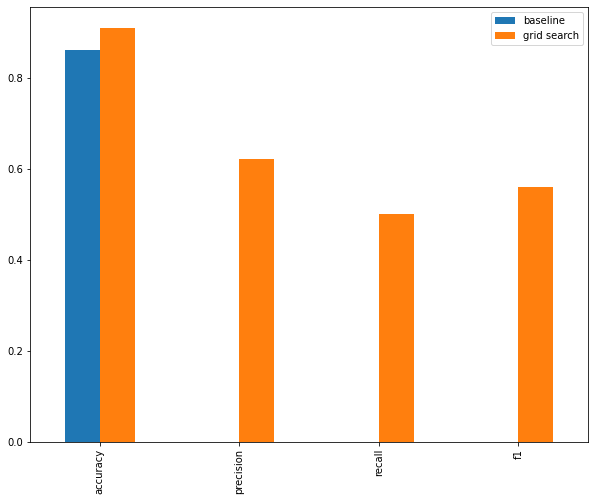

In [80]:
compare_metrics = pd.DataFrame({"baseline": baseline_gnb_metrics,
                                "grid search": gs_gnb_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

### 4.4 visualizing the Decision Tree

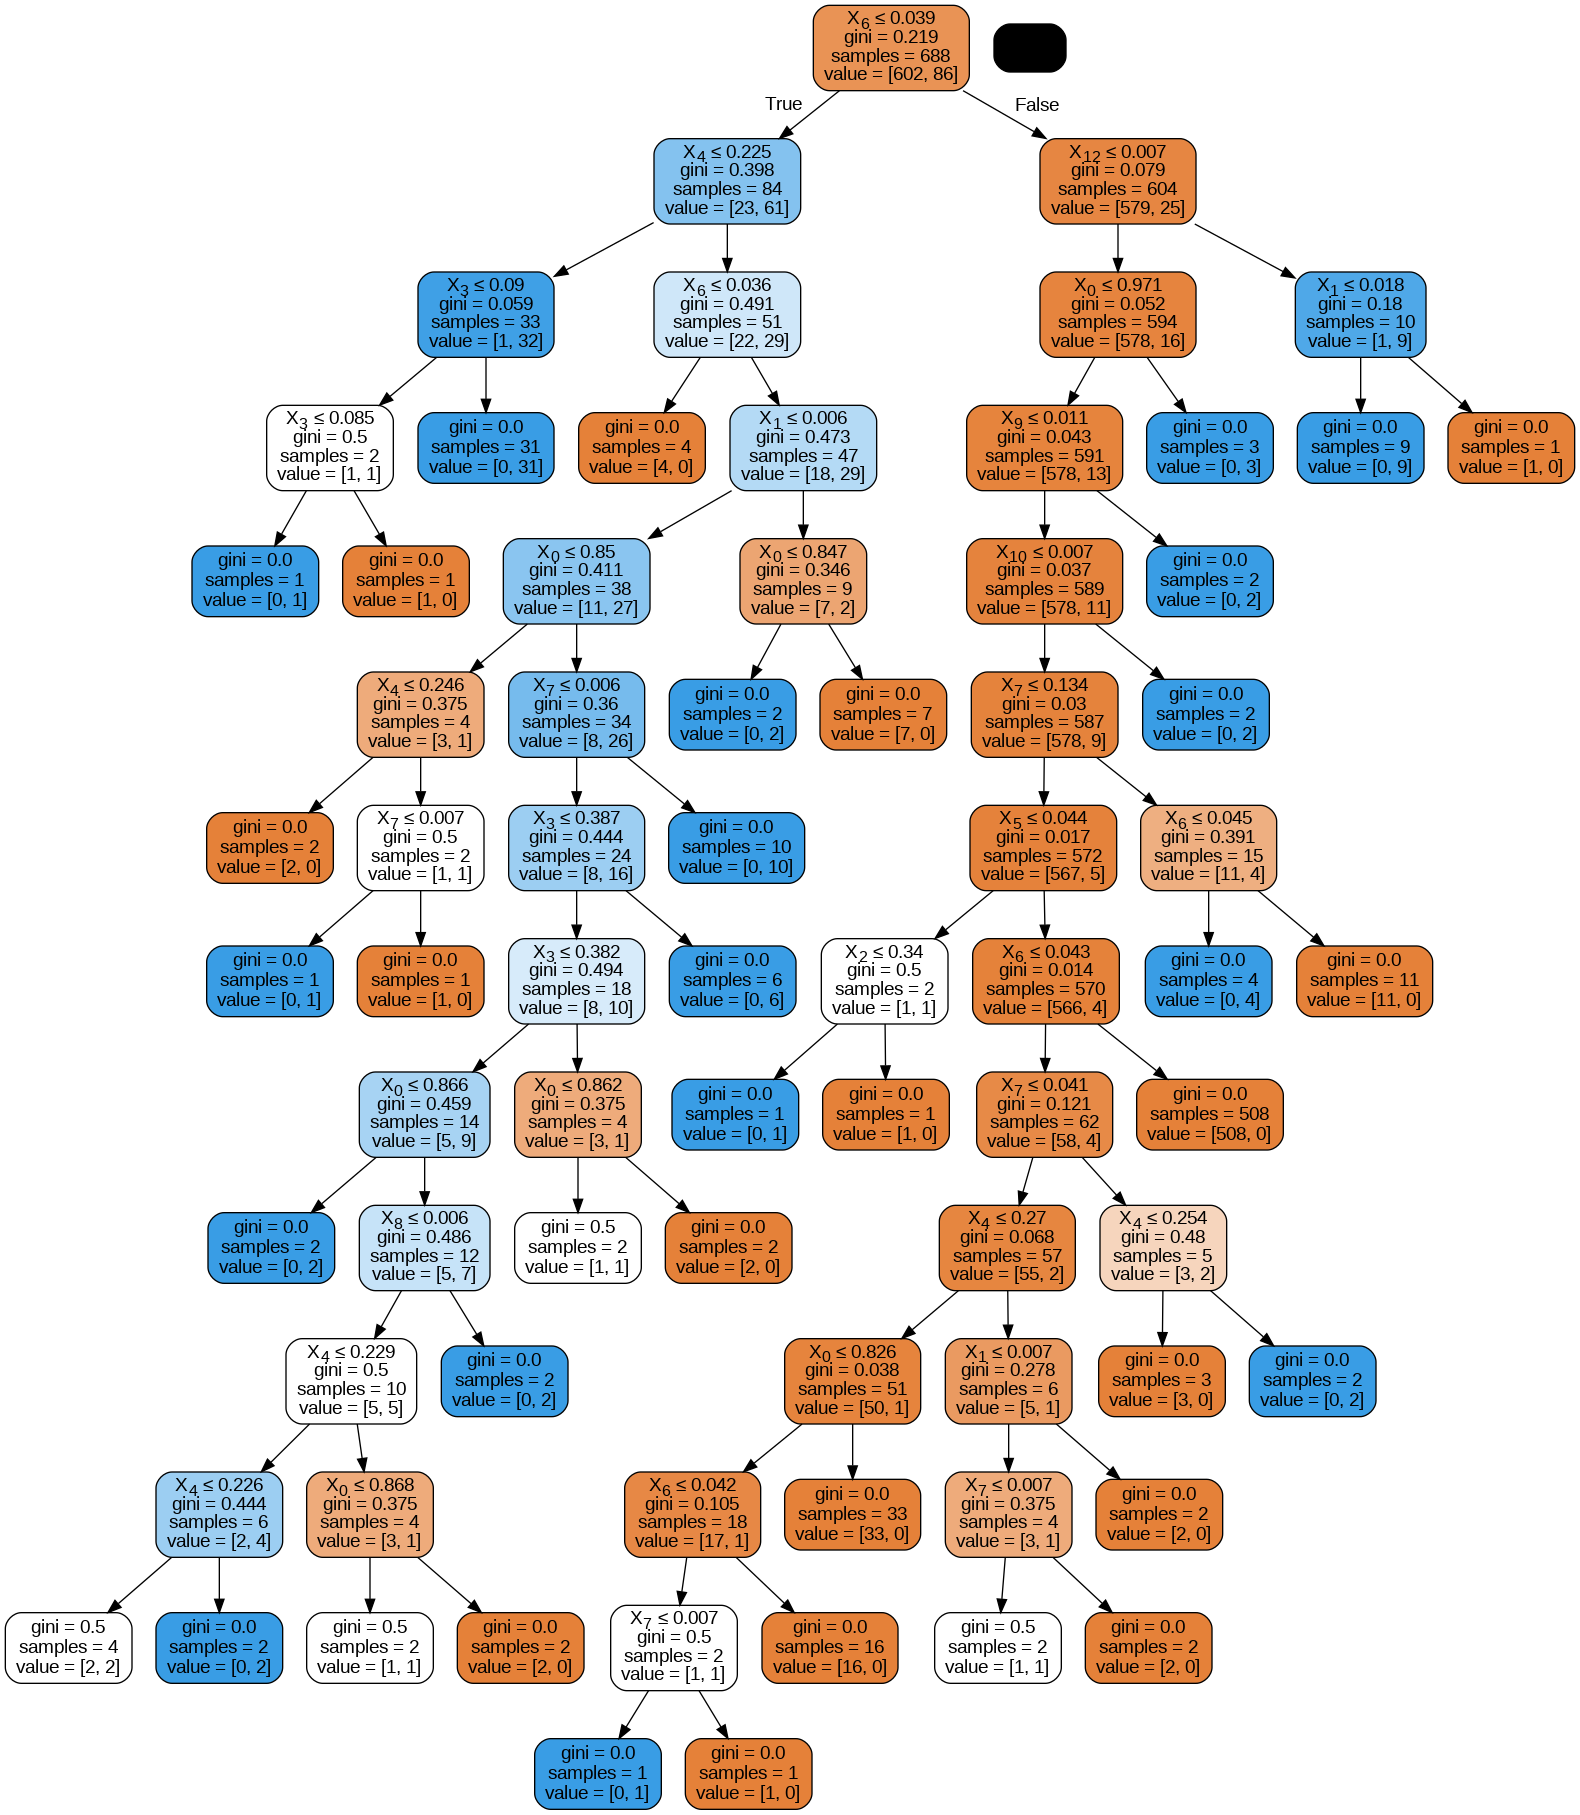

In [81]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, rounded = True, filled = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("dtree.png")
Image(graph.create_png())

## 5- Support Vector Machine  

In [78]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

### 5.1 Evaluating the model before the tuning of hyper-params

In [79]:
# Make baseline predictions
y_pred_svc = svc.predict(X_valid)

# Evaluate the classifier on validation set
baseline_svc_metrics = evaluate_preds(y_valid, y_pred_svc)
baseline_svc_metrics

Acc: 86.21%
Precision: 0.00
Recall: 0.00
F1 score: 0.00


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.86, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

`confusion matrix`



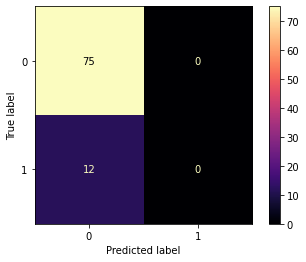

In [80]:
ConfusionMatrixDisplay.from_estimator(estimator=svc, X=X_valid, y=y_valid , cmap="magma");

`cross-validated accuracy`

In [81]:
np.random.seed(42)
svc_cross_val_score = cross_val_score(svc, X_final, y, cv=5)
np.mean(svc_cross_val_score)
print(f"Covid outcome prediction Cross-Validated Accuracy: {np.mean(svc_cross_val_score) *100:.2f}%")

Covid outcome prediction Cross-Validated Accuracy: 87.46%


`classifcation report`

In [82]:
print(classification_report(y_valid, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        75
           1       0.00      0.00      0.00        12

    accuracy                           0.86        87
   macro avg       0.43      0.50      0.46        87
weighted avg       0.74      0.86      0.80        87



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  `ROC`

In [ ]:
# svc.probability =True;
# y_probs_svc = svc.predict_proba(X_valid)
# y_probs_positive = y_probs_gnb[:, 1]

# # Caculate fpr, tpr and thresholds
# fpr, tpr, thresholds = roc_curve(y_valid, y_probs_positive)
# plot_roc_curve(fpr, tpr)

### 5.2 Finding the best hyper-params


In [83]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [84]:
grid_svc = {'kernel': ['poly','rbf','sigmoid'],
            'degree': np.arange(1,30),
            'random_state':[3],
            'C': np.arange(0,2),
            'gamma':['scale', 'auto']}
np.random.seed(42)
gs_svc = GridSearchCV(estimator=svc,
                      param_grid=grid_svc, 
                      cv=4,
                      verbose=1,
                      scoring='accuracy')
# Fit the GridSearchCV version of Gaussian naive bayes
gs_svc.fit(X_train, y_train);

Fitting 4 folds for each of 348 candidates, totalling 1392 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
696 fits failed out of a total of 1392.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
696 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 189, i

In [85]:
gs_svc.best_params_

{'C': 1, 'degree': 17, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 3}

### 5.3 Evaluating the Tuned model

In [91]:
gs_y_preds_svc = gs_svc.predict(X_test)
# evaluate the predictions
gs_svc_metrics = evaluate_preds(y_test, gs_y_preds_svc)

Acc: 95.35%
Precision: 0.88
Recall: 0.70
F1 score: 0.78


`ROC for tuned model`

In [92]:
y_probs_svc = gs_svc.predict_proba(X_test)
y_probs_positive = y_probs_gnb[:, 1]

# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

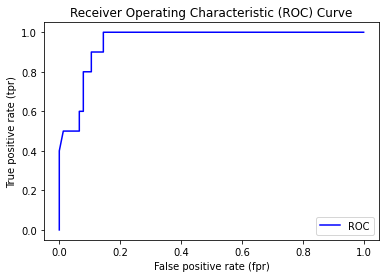

In [93]:
plot_roc_curve(fpr,tpr)

`confusion matrix`

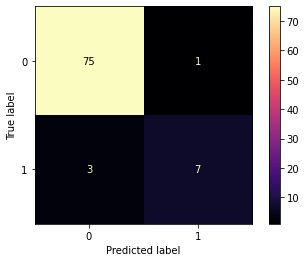

In [94]:
ConfusionMatrixDisplay.from_estimator(estimator=gs_svc, X=X_test, y=y_test , cmap="magma");

### comparing baseline model with tuned model metrics


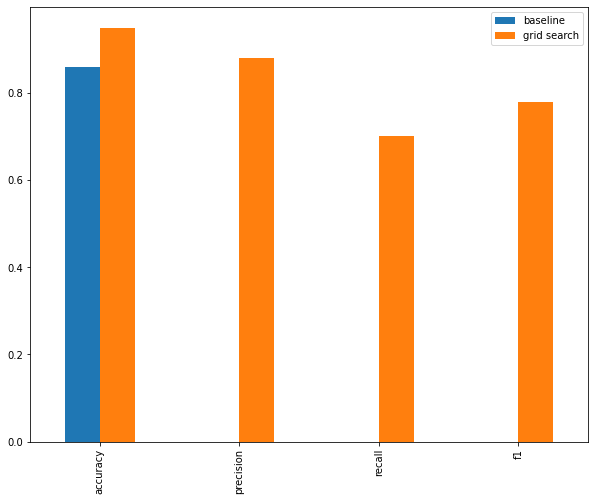

In [95]:
compare_metrics = pd.DataFrame({"baseline": baseline_svc_metrics,
                                "grid search": gs_svc_metrics})

compare_metrics.plot.bar(figsize=(10, 8));

## Testing  the estimators

### Testing KNN

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.75      0.60      0.67        10

    accuracy                           0.93        86
   macro avg       0.85      0.79      0.81        86
weighted avg       0.93      0.93      0.93        86



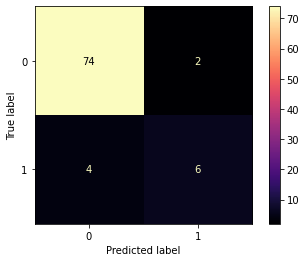

In [86]:
y_pred = gs_knn.predict(X_test)
ConfusionMatrixDisplay.from_estimator(estimator=gs_knn, X=X_test, y=y_test , cmap="magma");
print(classification_report(y_test, y_pred))

In [87]:
knn_test_metrics = evaluate_preds(y_test, y_pred)


Acc: 93.02%
Precision: 0.75
Recall: 0.60
F1 score: 0.67


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


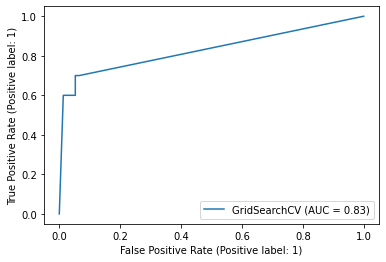

In [88]:
metrics.plot_roc_curve(gs_knn,X_test,y_test)

### Testing LOGReg

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.86      0.60      0.71        10

    accuracy                           0.94        86
   macro avg       0.90      0.79      0.84        86
weighted avg       0.94      0.94      0.94        86



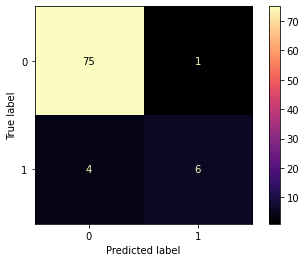

In [89]:
y_pred = gs_log_reg.predict(X_test)
ConfusionMatrixDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test , cmap="magma");
print(classification_report(y_test, y_pred))

In [90]:
log_reg_test_metrics = evaluate_preds(y_test, y_pred)


Acc: 94.19%
Precision: 0.86
Recall: 0.60
F1 score: 0.71


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


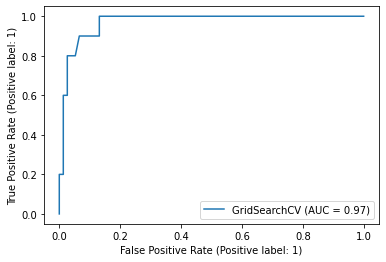

In [91]:
metrics.plot_roc_curve(gs_log_reg,X_test,y_test)

### Testing Naive bayes

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        76
           1       0.62      0.50      0.56        10

    accuracy                           0.91        86
   macro avg       0.78      0.73      0.75        86
weighted avg       0.90      0.91      0.90        86



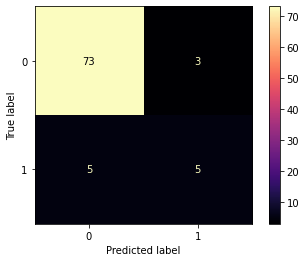

In [92]:
y_pred = gs_gnb.predict(X_test)
ConfusionMatrixDisplay.from_estimator(estimator=gs_gnb, X=X_test, y=y_test , cmap="magma");
print(classification_report(y_test, y_pred))

In [93]:
gnb_test_metrics = evaluate_preds(y_test, y_pred)


Acc: 90.70%
Precision: 0.62
Recall: 0.50
F1 score: 0.56


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


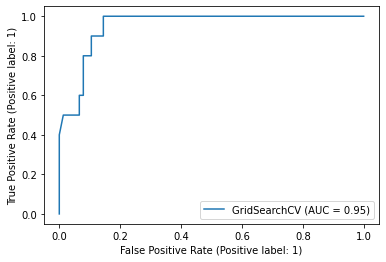

In [94]:
metrics.plot_roc_curve(gs_gnb,X_test,y_test)

### Testing Decision Tree

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.86      0.60      0.71        10

    accuracy                           0.94        86
   macro avg       0.90      0.79      0.84        86
weighted avg       0.94      0.94      0.94        86



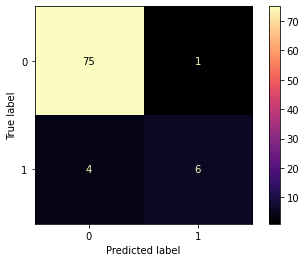

In [95]:
y_pred = gs_dtree.predict(X_test)
ConfusionMatrixDisplay.from_estimator(estimator=gs_dtree, X=X_test, y=y_test , cmap="magma");
print(classification_report(y_test, y_pred))

In [96]:
dtree_test_metrics = evaluate_preds(y_test, y_pred)


Acc: 94.19%
Precision: 0.86
Recall: 0.60
F1 score: 0.71


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


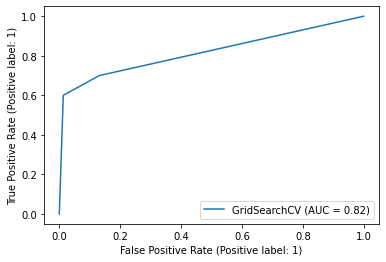

In [97]:
metrics.plot_roc_curve(gs_dtree,X_test,y_test)

### Testing SVM

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        76
           1       0.88      0.70      0.78        10

    accuracy                           0.95        86
   macro avg       0.92      0.84      0.88        86
weighted avg       0.95      0.95      0.95        86



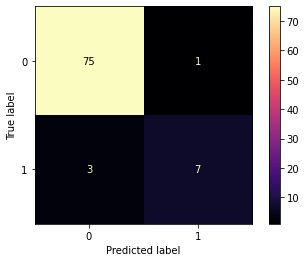

In [98]:
y_pred = gs_svc.predict(X_test)
ConfusionMatrixDisplay.from_estimator(estimator=gs_svc, X=X_test, y=y_test , cmap="magma");
print(classification_report(y_test, y_pred))

In [99]:
svc_test_metrics = evaluate_preds(y_test, y_pred)


Acc: 95.35%
Precision: 0.88
Recall: 0.70
F1 score: 0.78


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


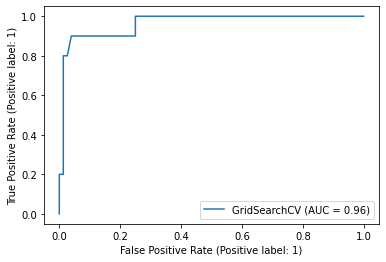

In [100]:
metrics.plot_roc_curve(gs_svc,X_test,y_test)